In [1]:
%matplotlib inline
import requests as req
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wc
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

In [2]:
def requestByYear(year):
    print('Downloading from year ', year, end=' ')
    url = 'https://dblp.org/search/publ/api?q=toc%3Adb/conf/geoinfo/geoinfo{}.bht%3A&h=1000&format=json'\
            .format(year)
    ans = req.get(url)
    print(' done, status code ', ans.status_code)
    return json.loads(ans.content)

def getAllYearAvaiable(start, end):
    columns = {'venue': [], 'authors': [], 'title': [], 'type': [], 'year': [], 'url': []}
    for year in range(start, end+1):
        publications = requestByYear(year)
        try:
            for publication in publications['result']['hits']['hit'][:-1]:
                columns['venue'].append(publication['info']['venue'])
                authors = publication['info']['authors']['author']
                authors = ','.join(authors) if isinstance(authors, list) else authors
                columns['authors'].append(authors)
                columns['title'].append(publication['info']['title'])
                columns['type'].append(publication['info']['type'])
                columns['year'].append(year)
                columns['url'].append(publication['info']['url'])
        except KeyError:
            print('In %d not have venue'%year)
    return pd.DataFrame(columns)

def remove_stop_words(text):
    stop_words = ['de', 'a', 'by', 'for', 'e', 'of', 'o', 'as', 'and', 'the', 'em',
                  'com', 'de', 'da', 'para', 'um', 'uma', 'in', 'on']
    
    for sw in stop_words:
        text = re.sub(r'\b%s\b' % sw, "", text)
    return text

def remove_accentuation(text):
    text = unicodedata.normalize('NFKD', str(text)).encode('ASCII','ignore')
    return text.decode("utf-8")

def to_lowercase(text):
    return text.lower()

def tokenize_refined(text):
    tokenPattern = r"[A-Z0-9-']+|\.|\!|,:=\""
    #tokenPattern = "[A-Z]+|\\.|\\!|\-|,"
    tokens = re.findall(tokenPattern, text, re.IGNORECASE)
    return tokens

def remove_punctuation(text):
    # re.sub(replace_expression, replace_string, target)
    new_text = re.sub(r"\.|,|\(|\)|;|!|\?", "", text)
    return new_text

def format_text(text):
    text = to_lowercase(text)
    text = remove_accentuation(text)
    text = remove_punctuation(text)
    text = remove_stop_words(text)
    return text

In [3]:
dfAllyears = getAllYearAvaiable(2003, 2018)

In 2009 not have venue


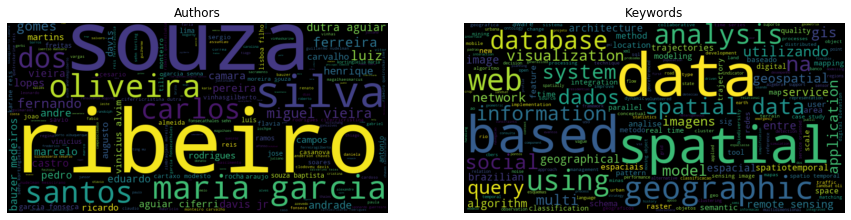

In [18]:
authors = [author.replace(',', '') for author in dfAllyears.authors]
authors = ' '.join(authors)
wordcloudAuthors = wc(width=800, height=400).generate(format_text(authors))

fig, ax = plt.subplots(1, 2, figsize=(15,8) )
ax[0].imshow(wordcloudAuthors, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Authors')

allTitles = [title for title in dfAllyears.title]
allTitles = ','.join(allTitles)

wordcloudTitles = wc(width=800, height=400)
wordcloudTitles.generate_from_text(format_text(allTitles))

ax[1].imshow(wordcloudTitles, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Keywords')

plt.axis("off")
plt.savefig('wordcloud-geoinfo.png', dpi=300, bbox_inches='tight', transparent="True", pad_inches=0)
plt.show()

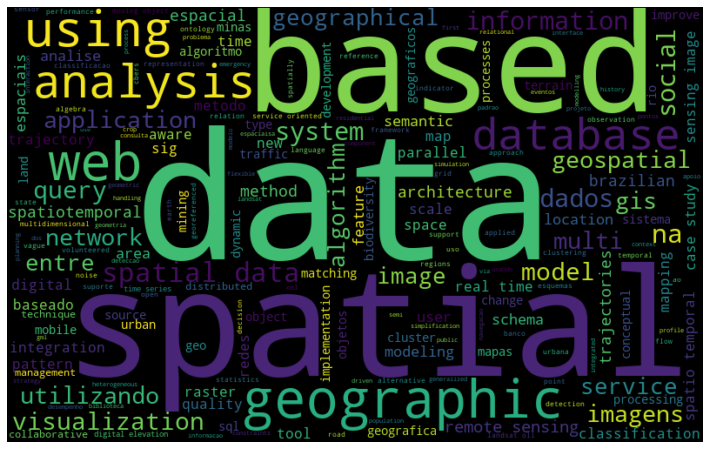

In [15]:
authors = [author.replace(',', '') for author in dfAllyears.authors]
authors = ' '.join(authors)
wordcloudAuthors = wc(width=800, height=400).generate(format_text(authors))

plt.figure( figsize=(17,8) )
plt.imshow(wordcloudTitles, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud-authors-geoinfo.png', dpi=300)
plt.show()

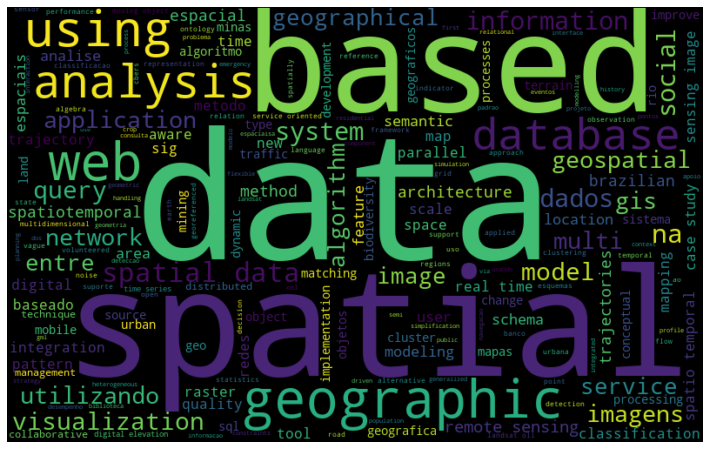

In [14]:
allTitles = [title for title in dfAllyears.title]
allTitles = ','.join(allTitles)

wordcloudTitles = wc(width=800, height=500)
wordcloudTitles.generate_from_text(format_text(allTitles))

plt.figure( figsize=(17,8) )
plt.imshow(wordcloudTitles, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud-keywords-geoinfo.png', dpi=300)
plt.show()

!(wordcloud-geoinfo.png)